In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv("../Data/gdp_percapita.csv")

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [8]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


In [9]:
gdp_df.shape

(7662, 4)

In [10]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
gdp_df = gdp_df.drop('Value Footnotes',axis=1)

In [13]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [14]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [16]:
missing_countries = gdp_df.groupby('Country')['Year'].count().sort_values().reset_index()

In [17]:
print(missing_countries)

                       Country  Year
0                     Djibouti    10
1                      Somalia    10
2     Turks and Caicos Islands    12
3    Sint Maarten (Dutch part)    14
4                       Kosovo    15
..                         ...   ...
237                    Jamaica    33
238                      Japan    33
239                     Jordan    33
240                  IDA total    33
241                   Zimbabwe    33

[242 rows x 2 columns]


In [18]:
missing_countries = missing_countries.rename(columns={'Year':'count_of_year'})

In [19]:
missing_countries

,Country,count_of_year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [20]:
missing_countries[missing_countries['count_of_year']<33]['Country'].count()

40

In [21]:
missing_countries[missing_countries['count_of_year']==33]['Country'].count()

202

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [23]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


In [24]:
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


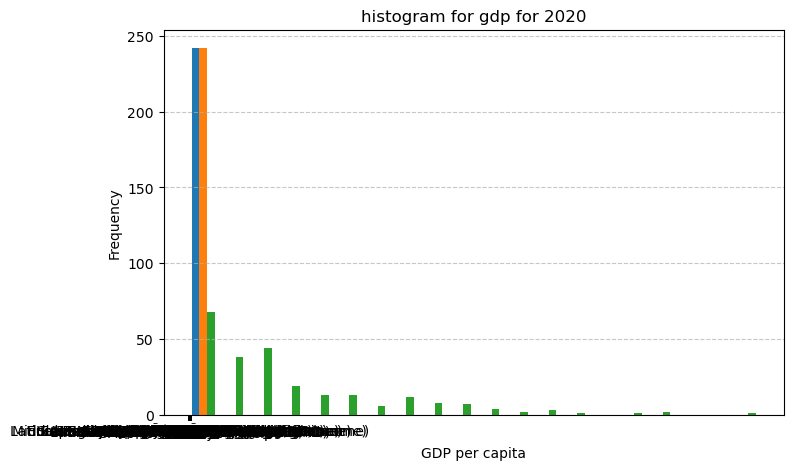

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(gdp_2020, bins=20)
plt.title("histogram for gdp for 2020")
plt.xlabel("GDP per capita")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

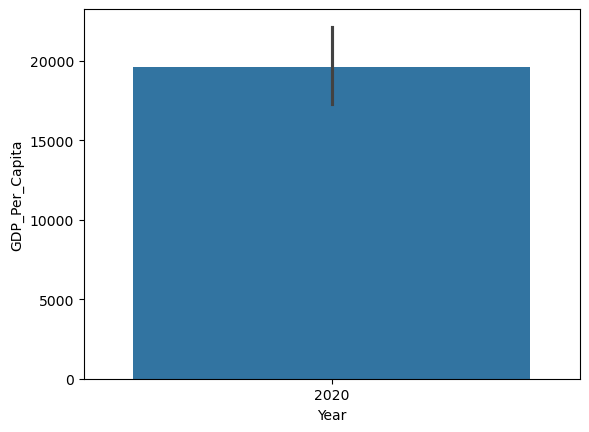

In [26]:
sns.barplot(data = gdp_2020,x='Year',y='GDP_Per_Capita')


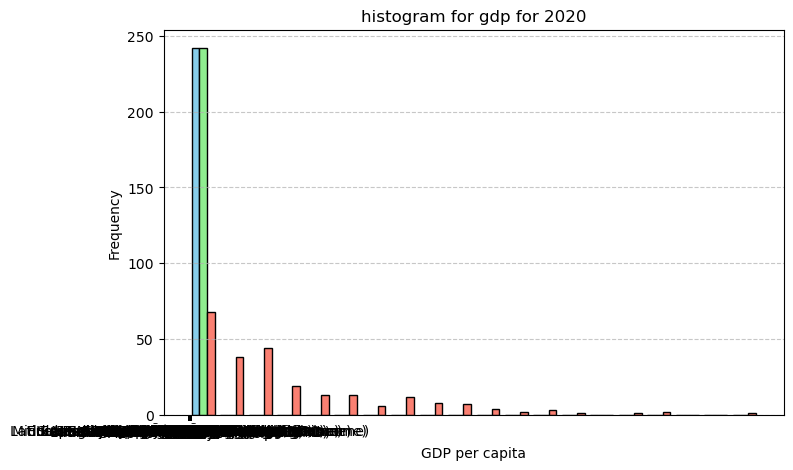

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(gdp_2020, bins=20, color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title("histogram for gdp for 2020")
plt.xlabel("GDP per capita")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 9. What was the median GDP per capita value in 2020?

In [29]:
median_for_2020 = gdp_2020['GDP_Per_Capita'].median()

In [30]:
median_for_2020 

13357.997573370474

# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

In [32]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]


# 10. A boxplot 

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

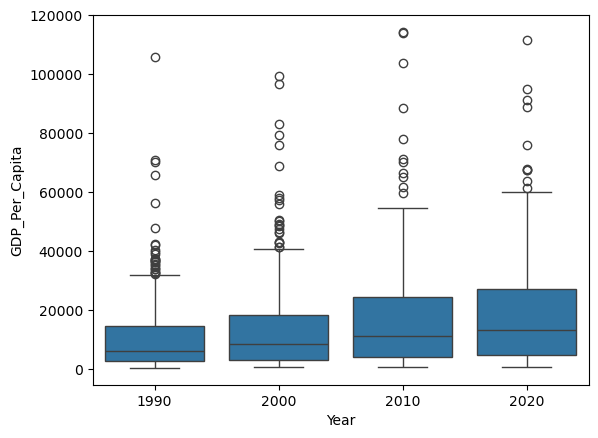

In [34]:
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

# 10. A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

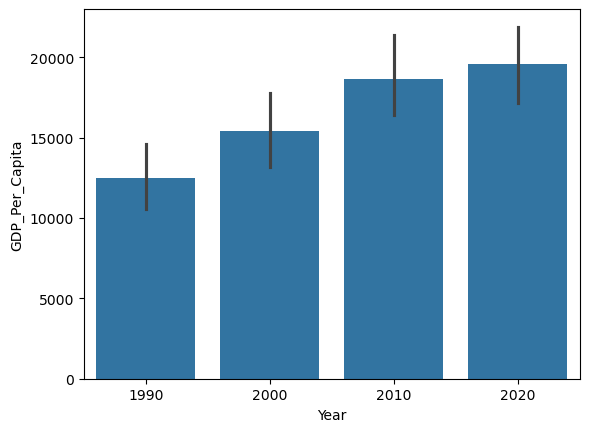

In [36]:
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

# 10.c. A scatterplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

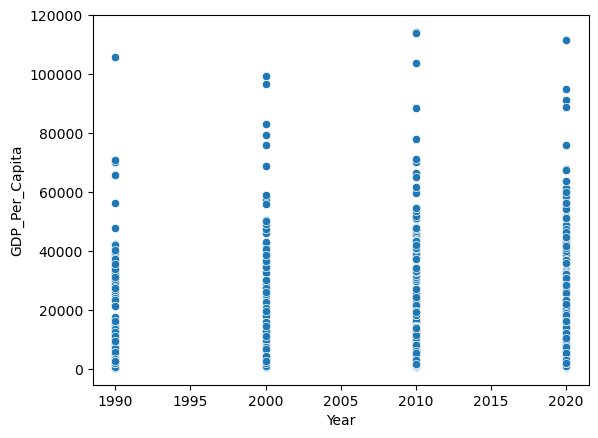

In [38]:
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

# 10. d: A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

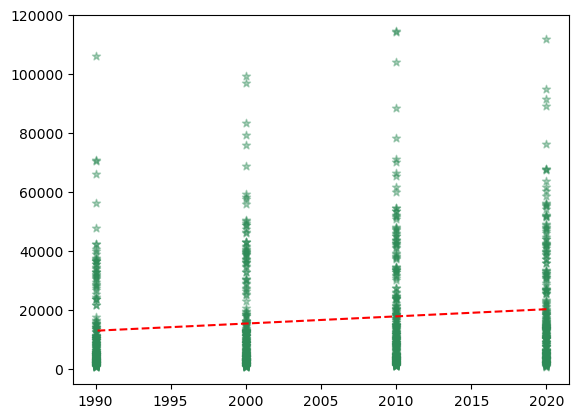

In [40]:
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita, color = 'seagreen', marker ='*', alpha = 0.4)
trend = np.polyfit(gdp_decades.Year,gdp_decades.GDP_Per_Capita ,1)
trend_var = np.poly1d(trend)
plt.plot(gdp_decades.Year, trend_var(gdp_decades.Year),"r--")
plt.show()

# 11: Which country was the first to have a GDP per capita greater than $100,000?

In [42]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


# 12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

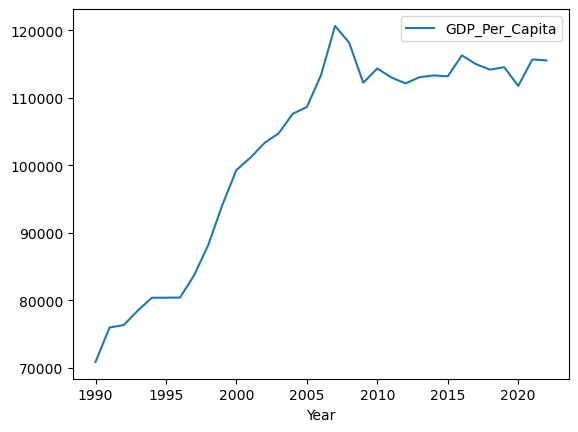

In [44]:
gdp_df[gdp_df['Year']==2020]
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')
top_country = gdp_df[gdp_df['Country']=='Luxembourg']
top_country.plot(x='Year',
                 y='GDP_Per_Capita',
                 kind='line');

# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

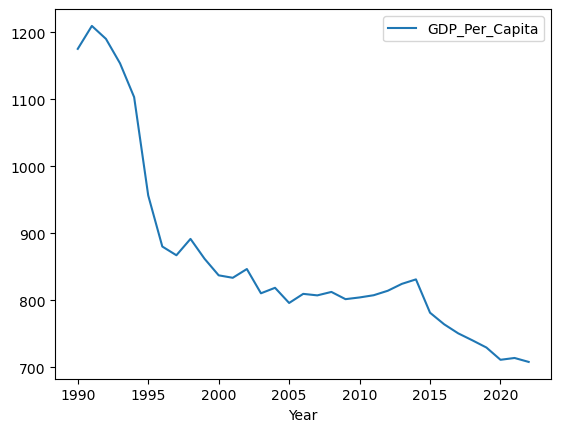

In [46]:
gdp_df[gdp_df['Year']==2020]
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')
gdp_df[gdp_df['Country']==('Burundi')]
smallest_country = gdp_df[gdp_df['Country']==('Burundi')]
smallest_country
smallest_country.plot(x='Year',
                 y='GDP_Per_Capita',
                 kind='line');

# 14: Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
internet_df = pd.read_csv("../data/internet_use.csv",nrows=6083)

In [50]:

internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [51]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [52]:
internet_df.tail

<bound method NDFrame.tail of      Country or Area  Year      Value Value Footnotes
0        Afghanistan  2019  17.600000               1
1        Afghanistan  2018  16.800000               2
2        Afghanistan  2017  13.500000               3
3        Afghanistan  2016  11.000000               4
4        Afghanistan  2015   8.260000               4
...              ...   ...        ...             ...
6078        Zimbabwe  1997   0.033080             NaN
6079        Zimbabwe  1996   0.016790             NaN
6080        Zimbabwe  1995   0.007684             NaN
6081        Zimbabwe  1994   0.001739             NaN
6082        Zimbabwe  1990   0.000000             NaN

[6083 rows x 4 columns]>

In [53]:
internet_df.shape

(6083, 4)

In [54]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [55]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [57]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [58]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [59]:
internet_df.rename(columns = {"Country or Area" : "Country", "Value" : "Internet_User_Pct"}, inplace=True)

In [60]:
internet_df.head()

,Country,Year,Internet_User_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [62]:
internet_df['Year'].nunique()

34

In [63]:
internet_df['Year'].unique

<bound method Series.unique of 0       2019
1       2018
2       2017
3       2016
4       2015
        ... 
6078    1997
6079    1996
6080    1995
6081    1994
6082    1990
Name: Year, Length: 6083, dtype: int64>

In [64]:
internet_df.groupby('Year').size()

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
dtype: int64

### 17. What is the first year to have a non-zero internet users percentage value?

In [66]:
non_zero = internet_df[internet_df['Internet_User_Pct']>0]

In [67]:
non_zero

,Country,Year,Internet_User_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [68]:
first_year = non_zero['Year'].min()

In [69]:
first_year

1990

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [71]:
internet_df.head()

,Country,Year,Internet_User_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [72]:
df_filtered = internet_df[internet_df['Year'].isin([2000,2014])]

In [73]:
df_filtered

,Country,Year,Internet_User_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


In [74]:
new_data_2000 = df_filtered[df_filtered['Year'].isin([2000])]

In [75]:
new_data_2000.head()

,Country,Year,Internet_User_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400


In [76]:
data_2000 = df_filtered[df_filtered['Year']==2000]
data_2014 = df_filtered[df_filtered['Year']==2014]

In [77]:
data_2000.head()

,Country,Year,Internet_User_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400


In [78]:
data_2014.head()

,Country,Year,Internet_User_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623


Text(0.5, 0, 'percentage of internet user')

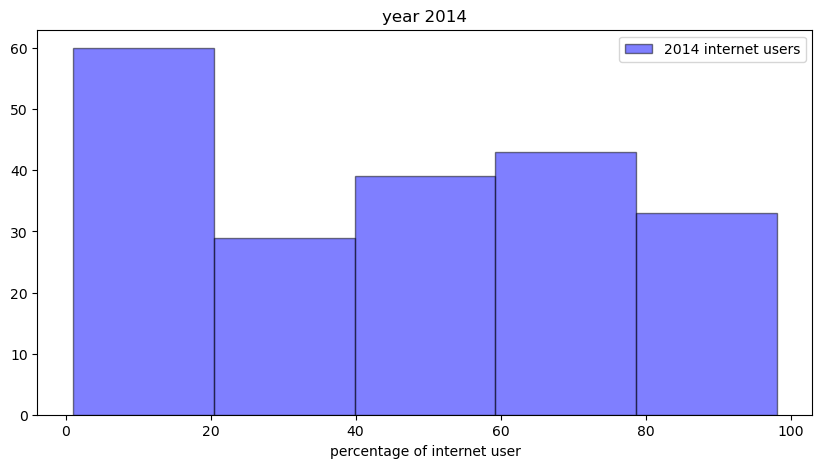

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.hist(data_2014['Internet_User_Pct'], bins = 5, alpha = 0.5, label = '2014 internet users', color ='blue', edgecolor = 'black')
plt.legend()
plt.title("year 2014")
plt.xlabel("percentage of internet user")

Text(0.5, 0, 'percentage of internet user')

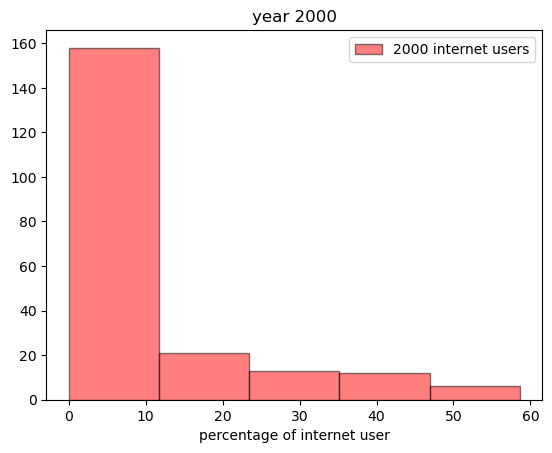

In [80]:
plt.hist(data_2000['Internet_User_Pct'], bins = 5, alpha = 0.5, label = '2000 internet users', color ='red', edgecolor = 'black')
plt.legend()
plt.title("year 2000")
plt.xlabel("percentage of internet user")

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [82]:
data_2014.head()

,Country,Year,Internet_User_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623


In [83]:
user_percentage = data_2014[data_2014['Internet_User_Pct'] < 5]
user_percentage.head()

,Country,Year,Internet_User_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000


In [84]:
num_countries = data_2014['Country'].nunique()
num_countries

204

In [85]:
data_2014.head(20)

,Country,Year,Internet_User_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
136,Anguilla,2014,70.3900
161,Antigua and Barbuda,2014,67.7800
190,Argentina,2014,64.7000
222,Armenia,2014,54.6228
247,Aruba,2014,83.7800


In [86]:
countries = data_2014.sort_values(by='Internet_User_Pct', ascending =False)
top_countries = countries.head(3)

In [87]:
top_countries

,Country,Year,Internet_User_Pct
2592,Iceland,2014,98.158
1893,Falkland (Malvinas) Islands,2014,97.600
602,Bermuda,2014,96.800


### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [89]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on= ["Country","Year"], how='outer')

In [90]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_User_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


In [91]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_User_Pct
9107,Zimbabwe,2018,2399.621551,25.0000
9108,Zimbabwe,2019,2203.396810,26.5883
9109,Zimbabwe,2020,1990.319419,29.2986
9110,Zimbabwe,2021,2115.144555,32.4616
9111,Zimbabwe,2022,2143.237574,32.5615


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [93]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [94]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_User_Pct
14,Afghanistan,2014,2144.449634,7.0
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3
145,Algeria,2014,11561.259795,29.5


### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [96]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_User_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


In [97]:
gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

,Country,Year,GDP_Per_Capita,Internet_User_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


In [98]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [99]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_User_Pct
14,Afghanistan,2014,2144.449634,7.0
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3
145,Algeria,2014,11561.259795,29.5


### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

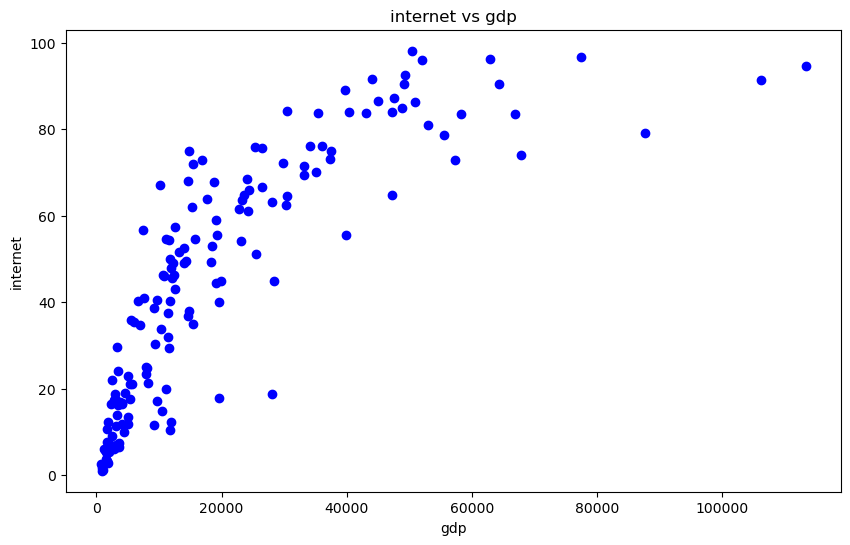

In [101]:
plt.figure(figsize =(10,6))

plt.scatter(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_User_Pct'], color='blue', label='Countries')

plt.title("internet vs gdp")
plt.xlabel("gdp")
plt.ylabel("internet")
plt.show()

In [102]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [103]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_User_Pct
14,Afghanistan,2014,2144.449634,7.0
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3
145,Algeria,2014,11561.259795,29.5


In [104]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
7,Afghanistan,2014,2144.449634
28,Africa Eastern and Southern,2014,3642.875373
61,Africa Western and Central,2014,4146.994622
94,Albania,2014,11586.817446
127,Algeria,2014,11561.259795


In [105]:
gdp_2014['Gdp_Group'] = pd.qcut(gdp_2014['GDP_Per_Capita'], q=3, labels=["low", "medium", "high"])

C:\Users\Fakhruddin\AppData\Local\Temp\ipykernel_28540\792024719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_2014['Gdp_Group'] = pd.qcut(gdp_2014['GDP_Per_Capita'], q=3, labels=["low", "medium", "high"])


In [106]:
gdp_2014.head(20)

,Country,Year,GDP_Per_Capita,Gdp_Group
7,Afghanistan,2014,2144.449634,low
28,Africa Eastern and Southern,2014,3642.875373,low
61,Africa Western and Central,2014,4146.994622,low
94,Albania,2014,11586.817446,medium
127,Algeria,2014,11561.259795,medium
160,Angola,2014,8183.164577,medium
193,Antigua and Barbuda,2014,18779.139077,medium
226,Arab World,2014,13872.227301,medium
259,Argentina,2014,23550.099060,high
292,Armenia,2014,11105.532500,medium


### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [108]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_User_Pct
14,Afghanistan,2014,2144.449634,7.0
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3
145,Algeria,2014,11561.259795,29.5


In [109]:
gdp_and_internet_use_2014['Gdp_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=["low", "medium", "high"])

C:\Users\Fakhruddin\AppData\Local\Temp\ipykernel_28540\1774801115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['Gdp_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=["low", "medium", "high"])


In [110]:
gdp_and_internet_use_2014.head(30)

,Country,Year,GDP_Per_Capita,Internet_User_Pct,Gdp_Group
14,Afghanistan,2014,2144.449634,7.0000,low
46,Africa Eastern and Southern,2014,3642.875373,NaN,low
79,Africa Western and Central,2014,4146.994622,NaN,low
112,Albania,2014,11586.817446,54.3000,medium
145,Algeria,2014,11561.259795,29.5000,medium
173,Andorra,2014,NaN,86.1000,NaN
205,Angola,2014,8183.164577,21.3623,medium
230,Anguilla,2014,NaN,70.3900,NaN
257,Antigua and Barbuda,2014,18779.139077,67.7800,medium
290,Arab World,2014,13872.227301,NaN,medium


### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [112]:
median_internet_users = gdp_and_internet_use_2014.groupby('Gdp_Group')['Internet_User_Pct'].median()

C:\Users\Fakhruddin\AppData\Local\Temp\ipykernel_28540\2736288950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_internet_users = gdp_and_internet_use_2014.groupby('Gdp_Group')['Internet_User_Pct'].median()


In [113]:
median_internet_users

Gdp_Group
low       11.0000
medium    45.8752
high      75.9800
Name: Internet_User_Pct, dtype: float64